In [2]:
import mat73

rbb1 = mat73.loadmat('C:/Users/dk866/Desktop/bearing_test/data/bancoDeDados/struct_r1b_R1.mat')
rbb2 = mat73.loadmat('C:/Users/dk866/Desktop/bearing_test/data/bancoDeDados/struct_r2b_R1.mat')
rbb3 = mat73.loadmat('C:/Users/dk866/Desktop/bearing_test/data/bancoDeDados/struct_r3b_R1.mat')
rbb4 = mat73.loadmat('C:/Users/dk866/Desktop/bearing_test/data/bancoDeDados/struct_r4b_R1.mat')

In [23]:
normal =mat73.loadmat('../data/bancoDeDados/struct_rs_R1.mat')

In [24]:
normal

{'rs': {'torque05': [{'Ia': array([ 0.01666667,  0.00833333,  0.        , ..., -1.166667  ,
           -1.158333  , -1.154167  ]),
    'Ib': array([-0.00416667,  0.        ,  0.        , ...,  1.270833  ,
            1.270833  ,  1.275     ]),
    'Ic': array([ 0.0125    ,  0.0125    ,  0.00833333, ..., -0.03333333,
           -0.05833333, -0.08333333]),
    'Trigger': array([6.219788 , 6.219482 , 6.219177 , ..., 0.8981323, 0.9078979,
           0.9179688]),
    'Va': array([  3.341667,   3.35    ,   3.3     , ..., 175.175   , 175.1833  ,
           174.8667  ]),
    'Vb': array([  3.341667,   3.35    ,   3.316667, ..., -40.125   , -38.75833 ,
           -37.75    ]),
    'Vc': array([   3.333333,    3.358333,    3.266667, ..., -131.0917  ,
           -131.95    , -132.9417  ]),
    'Vib_acpe': array([-0.0213623, -0.0213623, -0.0213623, ..., -3.234863 , -3.250122 ,
           -3.271484 ]),
    'Vib_acpi': array([-0.07019043, -0.04577637, -0.0213623 , ...,  2.835083  ,
            2.658

In [19]:
rbb1['r1b']['torque05'][0]

{'Ia': array([0.        , 0.        , 0.00833333, ..., 1.033333  , 1.0375    ,
        1.0625    ]),
 'Ib': array([ 0.00416667,  0.        , -0.00416667, ...,  0.8708333 ,
         0.8791667 ,  0.8625    ]),
 'Ic': array([-0.00416667,  0.        ,  0.        , ..., -1.525     ,
        -1.5125    , -1.5125    ]),
 'Trigger': array([6.200867, 6.201782, 6.202698, ..., 3.609314, 3.61908 , 3.62854 ]),
 'Va': array([ -1.183333,  -1.225   ,  -1.25    , ..., 175.      , 175.0417  ,
        175.125   ]),
 'Vb': array([ -1.175   ,  -1.233333,  -1.283333, ..., -66.21667 , -67.15833 ,
        -68.14167 ]),
 'Vc': array([  -1.166667,   -1.216667,   -1.258333, ..., -109.7583  ,
        -108.8667  , -108.0333  ]),
 'Vib_acpe': array([-0.03051758, -0.00915527,  0.00915527, ..., -3.19519   ,
        -3.295898  , -3.335571  ]),
 'Vib_acpi': array([ 0.3814697,  0.4180908,  0.4486084, ..., 12.13684  , 11.83167  ,
        11.54785  ]),
 'Vib_axial': array([-0.01220703, -0.01220703, -0.0213623 , ..., -0.61

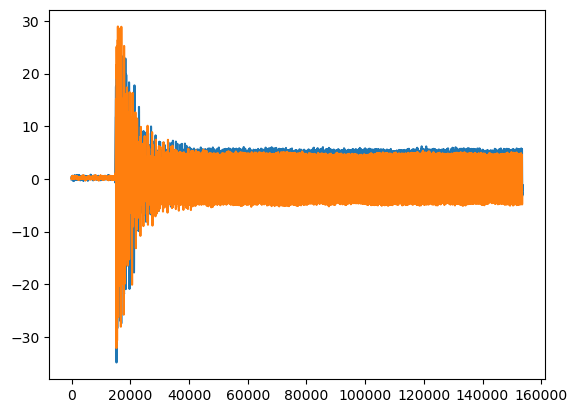

In [26]:
import matplotlib.pyplot as plt
plt.plot(rbb1['r1b']['torque05'][4]['Vib_acpe'])
plt.plot(normal['rs']['torque05'][4]['Vib_acpe'])

In [29]:
# FFT

import torch
import numpy as np

def calc_fft(data):
    Fs = 48000
    n = len(data)
    print(n)
    graph_data = torch.Tensor(data)
    graph_data.to("cuda:0")
    fft_data = torch.fft.rfft(graph_data) / n

    frequency = torch.arange(0.0, Fs/2.0, Fs/n)
    return frequency, fft_data

153504
153627
152160
152160


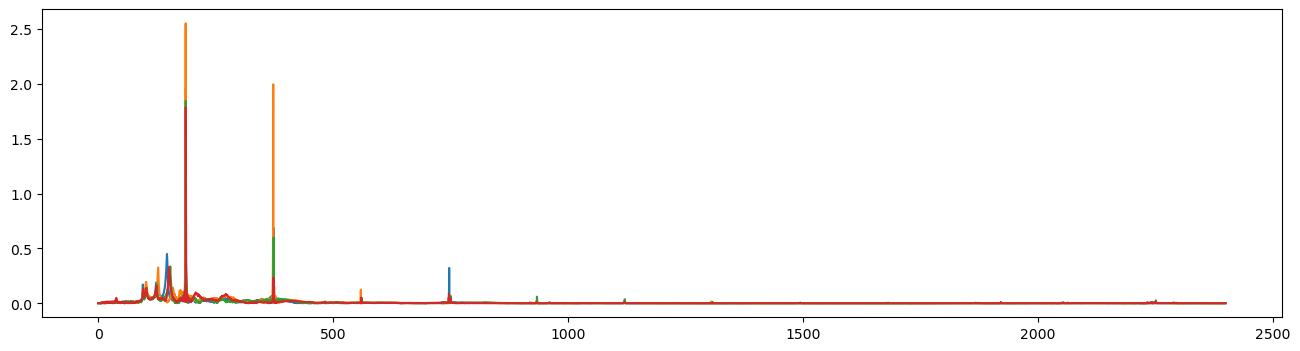

In [53]:
n_freq, n_fft = calc_fft(normal['rs']['torque05'][4]['Vib_acpe'])
freq1, fft1 = calc_fft(rbb1['r1b']['torque05'][4]['Vib_acpe'])
freq2, fft2 = calc_fft(rbb2['r2b']['torque05'][4]['Vib_acpe'])
freq3, fft3 = calc_fft(rbb3['r3b']['torque05'][4]['Vib_acpe'])
plt.figure(figsize=[16, 4])

plt.plot(freq3[1:len(fft3)//10], np.abs(fft3[1:len(fft3)//10]))
plt.plot(freq2[1:len(fft2)//10], np.abs(fft2[1:len(fft2)//10]))
plt.plot(freq1[1:len(fft1)//10], np.abs(fft1[1:len(fft1)//10]))
plt.plot(n_freq[1:len(n_fft)//10], np.abs(n_fft[1:len(n_fft)//10]))

153504


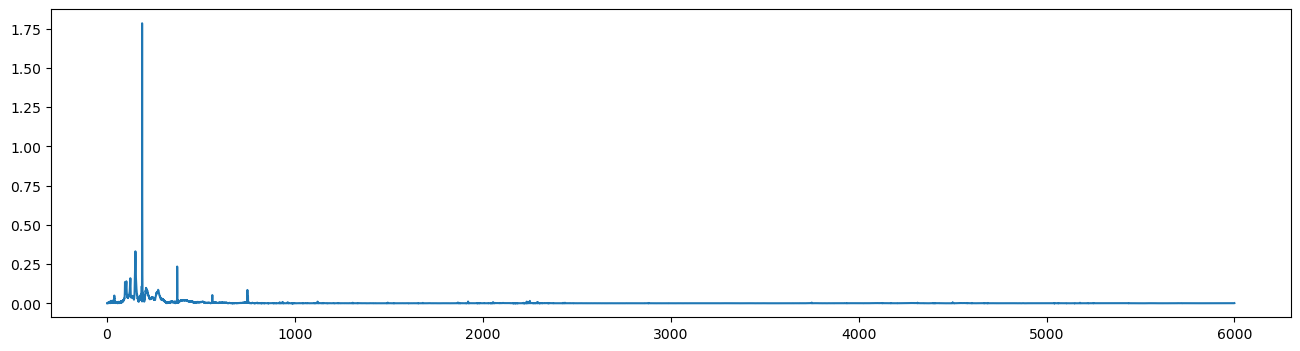